In [2]:
import pandas as pd
import re

RANDOM_SEED = 69

0	negative
1	neutral
2	positive

In [3]:
# File paths
train_text_path = 'Datasets/sem_eval_2017/train_text.txt'
train_labels_path = 'Datasets/sem_eval_2017/train_labels.txt'

val_text_path = 'Datasets/sem_eval_2017/val_text.txt'
val_labels_path = 'Datasets/sem_eval_2017/val_labels.txt'

test_text_path = 'Datasets/sem_eval_2017/test_text.txt'
test_labels_path = 'Datasets/sem_eval_2017/test_labels.txt'

In [4]:
with open(train_labels_path, "r", encoding="utf-8") as f:
    train_labels = [int(line.strip()) for line in f]

with open(train_text_path, "r", encoding="utf-8") as f:
    train_texts = [line.strip() for line in f]

assert len(train_labels) == len(train_texts), "Mismatch between labels and texts!"

train_df = pd.DataFrame({"text": train_texts, "label": train_labels})

print(train_df.shape)
train_df

(45615, 2)


,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2
...,...,...
45610,"@user \""""So amazing to have the beautiful Lady...",2
45611,"9 September has arrived, which means Apple's n...",2
45612,Leeds 1-1 Sheff Wed. Giuseppe Bellusci securin...,2
45613,@user no I'm in hilton head till the 8th lol g...,1


In [5]:
with open(val_labels_path, "r", encoding="utf-8") as f:
    val_labels = [int(line.strip()) for line in f]

with open(val_text_path, "r", encoding="utf-8") as f:
    val_texts = [line.strip() for line in f]

assert len(val_labels) == len(val_texts), "Mismatch between labels and texts!"

val_df = pd.DataFrame({"text": val_texts, "label": val_labels})

print(val_df.shape)
val_df

(2000, 2)


,text,label
0,Dark Souls 3 April Launch Date Confirmed With ...,1
1,"""National hot dog day, national tequila day, t...",2
2,When girls become bandwagon fans of the Packer...,0
3,@user I may or may not have searched it up on ...,1
4,Here's your starting TUESDAY MORNING Line up a...,1
...,...,...
1995,"""LONDON (AP) """" Prince George celebrates his s...",1
1996,Harper's Worst Offense against Refugees may be...,1
1997,Hold on... Sam Smith may do the theme to Spect...,2
1998,Gonna watch Final Destination 5 tonight. I alw...,1


In [6]:
with open(test_labels_path, "r", encoding="utf-8") as f:
    test_labels = [int(line.strip()) for line in f]

with open(test_text_path, "r", encoding="utf-8") as f:
    test_texts = [line.strip() for line in f]

assert len(test_labels) == len(test_texts), "Mismatch between labels and texts!"

test_df = pd.DataFrame({"text": test_texts, "label": test_labels})

print(test_df.shape)
test_df

(12284, 2)


,text,label
0,@user @user what do these '1/2 naked pics' hav...,1
1,OH: “I had a blue penis while I was this” [pla...,1
2,"@user @user That's coming, but I think the vic...",1
3,I think I may be finally in with the in crowd ...,2
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",0
...,...,...
12279,Sentinel Editorial: FBI’s Comey ‘had no one of...,1
12280,perfect pussy clips #vanessa hudgens zac efron...,1
12281,#latestnews 4 #newmexico #politics + #nativeam...,1
12282,Trying to have a conversation with my dad abou...,0


In [7]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove @ mentions
    tweet = re.sub(r'#[A-Za-z0-9_]+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', tweet)  # Remove non-alphabetic characters
    tweet = tweet.lower().strip()  # Lowercase and remove leading/trailing spaces
    return tweet

In [8]:
train_df["text"] = train_df["text"].apply(clean_tweet)
val_df["text"] = val_df["text"].apply(clean_tweet)
test_df["text"] = test_df["text"].apply(clean_tweet)

In [9]:
# Shape of each dataset before dropping NA
print("Shape of each dataset before dropping NA:")
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

# Drop na for each dataset
train_df = train_df.dropna(subset=['text'])
val_df = val_df.dropna(subset=['text'])
test_df = test_df.dropna(subset=['text'])

# Drop blank
train_df = train_df[train_df['text'] != ""]
val_df = val_df[val_df['text'] != ""]
test_df = test_df[test_df['text'] != ""]

# Reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Shape of each dataset after dropping NA
print("\nShape of each dataset after dropping NA:")
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)


Shape of each dataset before dropping NA:
(45615, 2)
(2000, 2)
(12284, 2)

Shape of each dataset after dropping NA:
(45614, 2)
(2000, 2)
(12282, 2)


In [10]:
# Combine the 3 datasets into 1
combined_df = pd.concat([train_df, val_df, test_df])

# Reset index to avoid duplicate indices
combined_df = combined_df.reset_index(drop=True)

# Display information about the combined dataset
print(f"Shape of combined dataset: {combined_df.shape}")
combined_df.head()

Shape of combined dataset: (59896, 2)


,text,label
0,"""qt in the original draft of the th book, rem...",2
1,"""ben smith smith concussion remains out of th...",1
2,sorry bout the stream last night i crashed out...,1
3,chase headley's rbi double in the th inning of...,1
4,"alciato: bee will invest million in january, ...",2


In [11]:
ternary_mapping = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

combined_df['emotion_name'] = combined_df['label'].map(ternary_mapping)

combined_df

,text,label,emotion_name
0,"""qt in the original draft of the th book, rem...",2,Positive
1,"""ben smith smith concussion remains out of th...",1,Neutral
2,sorry bout the stream last night i crashed out...,1,Neutral
3,chase headley's rbi double in the th inning of...,1,Neutral
4,"alciato: bee will invest million in january, ...",2,Positive
...,...,...,...
59891,sentinel editorial: fbis comey had no one of m...,1,Neutral
59892,perfect pussy clips hudgens zac efron naked,1,Neutral
59893,- protesting rise of alt-right at...,1,Neutral
59894,trying to have a conversation with my dad abou...,0,Negative


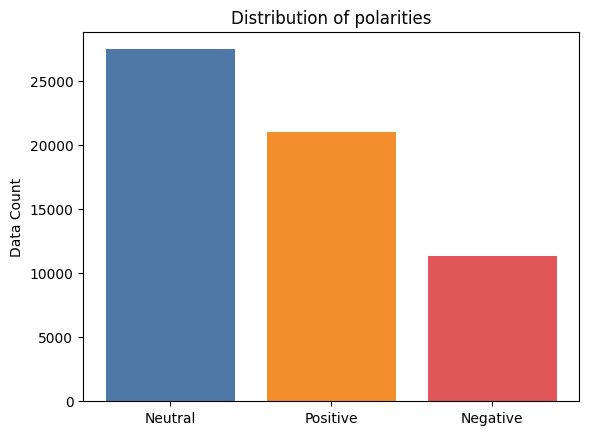

In [12]:
import matplotlib.pyplot as plt

source_counts = combined_df['emotion_name'].value_counts()

colors = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f', 
          '#edc949', '#af7aa1', '#ff9da7', '#9c755f', '#bab0ab']

plt.bar(source_counts.index, source_counts.values, color=colors[:len(source_counts)])
plt.title('Distribution of polarities')
plt.ylabel('Data Count')
plt.show()

In [13]:
combined_df['label'].value_counts()

label
1    27476
2    21043
0    11377
Name: count, dtype: int64

In [22]:
train_output_csv = 'Datasets/sem_eval_2017/sem_eval_2017_train.csv'
val_output_csv = 'Datasets/sem_eval_2017/sem_eval_2017_val.csv'
test_output_csv = 'Datasets/sem_eval_2017/sem_eval_2017_test.csv'

train_df.to_csv(train_output_csv, index=False, encoding="utf-8")
val_df.to_csv(val_output_csv, index=False, encoding="utf-8")
test_df.to_csv(test_output_csv, index=False, encoding="utf-8")

In [14]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Compute token lengths
def compute_token_length(text):
    encoded = tokenizer.encode(text, add_special_tokens=True)
    return len(encoded)

combined_df['token_length'] = combined_df['text'].apply(compute_token_length)

c:\Users\rey32\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Count entries exceeding thresholds
exceed_0 = len(combined_df[combined_df['token_length'] > 0])
exceed_100 = len(combined_df[combined_df['token_length'] > 100])
exceed_200 = len(combined_df[combined_df['token_length'] > 200])
exceed_300 = len(combined_df[combined_df['token_length'] > 300])
exceed_400 = len(combined_df[combined_df['token_length'] > 400])
exceed_500 = len(combined_df[combined_df['token_length'] > 500])

print(f"Number of entries exceeding 0 tokens: {exceed_0}")
print(f"Number of entries exceeding 100 tokens: {exceed_100}")
print(f"Number of entries exceeding 200 tokens: {exceed_200}")
print(f"Number of entries exceeding 300 tokens: {exceed_300}")
print(f"Number of entries exceeding 400 tokens: {exceed_400}")
print(f"Number of entries exceeding 500 tokens: {exceed_500}")

Number of entries exceeding 0 tokens: 59896
Number of entries exceeding 100 tokens: 0
Number of entries exceeding 200 tokens: 0
Number of entries exceeding 300 tokens: 0
Number of entries exceeding 400 tokens: 0
Number of entries exceeding 500 tokens: 0
